In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [4]:
#load the train dataset
train = pd.read_csv('/content/train.csv')

In [5]:
#inspect the first few rows of the train dataset
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# set the index to passengerId
train = train.set_index('PassengerId')

In [7]:
#load the test dataset
test = pd.read_csv('/content/test.csv')

In [8]:
#inspect the first few rows of the test dataset
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#by calling the shape attribute of the train dataset we can observe that there are 891 observations and 11 columns
#in the data set
train.shape

(891, 11)

In [10]:
# Check out the data summary
# Age, Cabin and Embarked has missing data
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [12]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [13]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=train.nunique()
datadict

,0,MissingVal,NUnique
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


In [14]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [15]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [16]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<ipython-input-22-95a92ca9e2cd>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[column].dropna(), kde=True, ax=axes[i])
<ipython-input-22-95a92ca9e2cd>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[column].dropna(), kde=True, ax=axes[i])


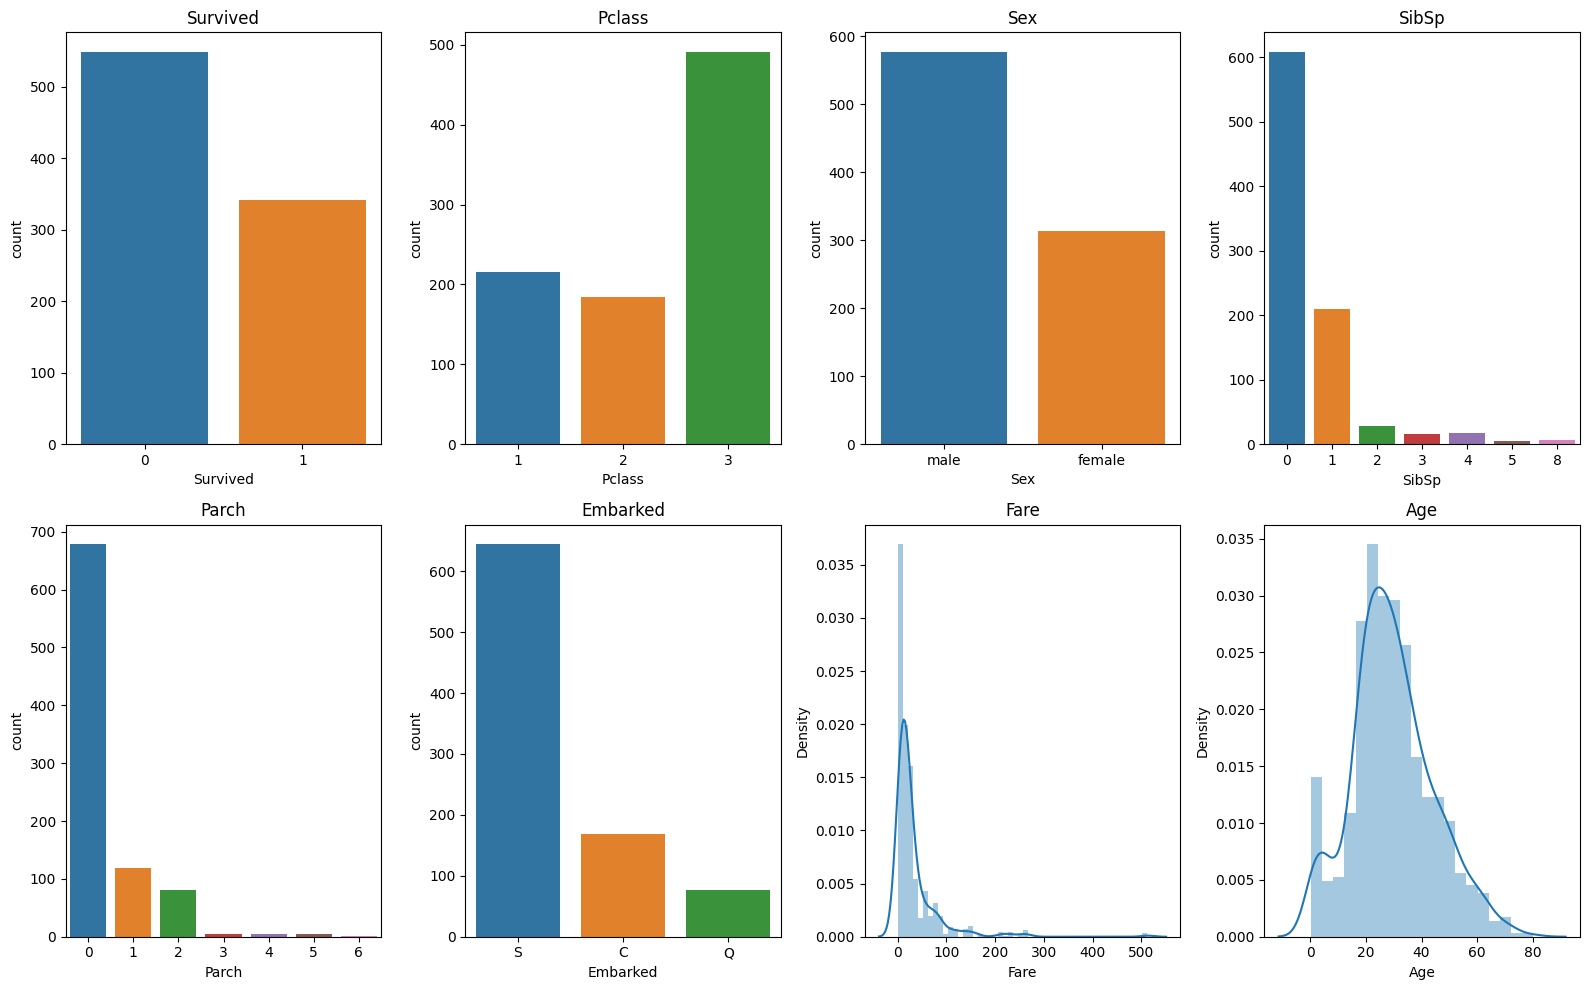

In [22]:
# List of columns to visualize
columns_to_plot = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']

# Calculate the number of rows and columns for the subplots grid
num_rows = 2
num_cols = 4

# Create a figure and axes using Matplotlib's object-oriented approach
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

# Flatten the axes to simplify indexing when iterating over columns
axes = axes.flatten()

# Loop over each column and create the corresponding plot
for i, column in enumerate(columns_to_plot):
    if column in ['Fare', 'Age']:
        sns.distplot(train[column].dropna(), kde=True, ax=axes[i])
    else:
        sns.countplot(x=column, data=train, ax=axes[i])
    axes[i].set_title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

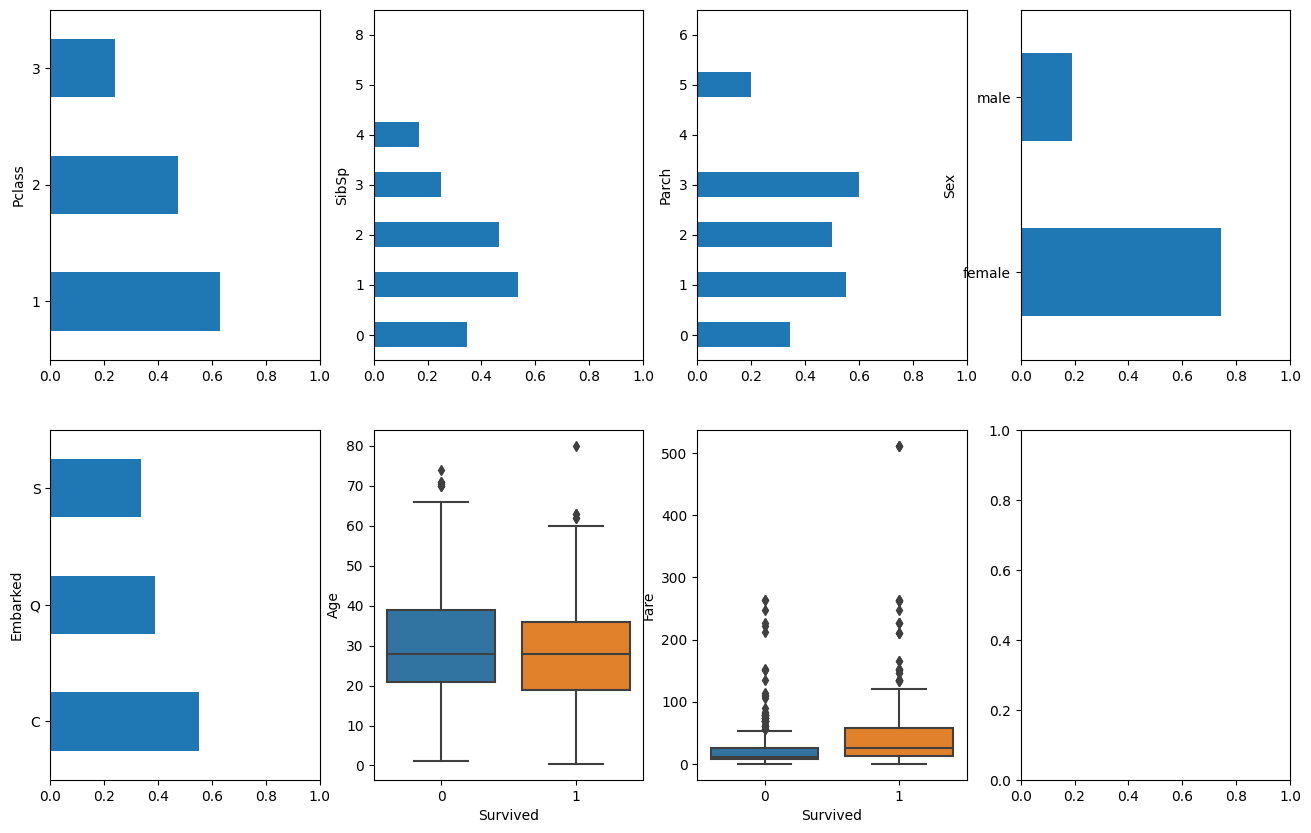

In [24]:
# Assuming 'train' DataFrame is available and contains the necessary columns, including 'Survived'

figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))

# Plot 1
ax1 = axesbi[0, 0]
train.groupby('Pclass')['Survived'].mean().plot(kind='barh', ax=ax1, xlim=[0, 1])

# Plot 2
ax2 = axesbi[0, 1]
train.groupby('SibSp')['Survived'].mean().plot(kind='barh', ax=ax2, xlim=[0, 1])

# Plot 3
ax3 = axesbi[0, 2]
train.groupby('Parch')['Survived'].mean().plot(kind='barh', ax=ax3, xlim=[0, 1])

# Plot 4
ax4 = axesbi[0, 3]
train.groupby('Sex')['Survived'].mean().plot(kind='barh', ax=ax4, xlim=[0, 1])

# Plot 5
ax5 = axesbi[1, 0]
train.groupby('Embarked')['Survived'].mean().plot(kind='barh', ax=ax5, xlim=[0, 1])

# Plot 6
ax6 = axesbi[1, 1]
sns.boxplot(x="Survived", y="Age", data=train, ax=ax6)

# Plot 7
ax7 = axesbi[1, 2]
sns.boxplot(x="Survived", y="Fare", data=train, ax=ax7)

plt.show()


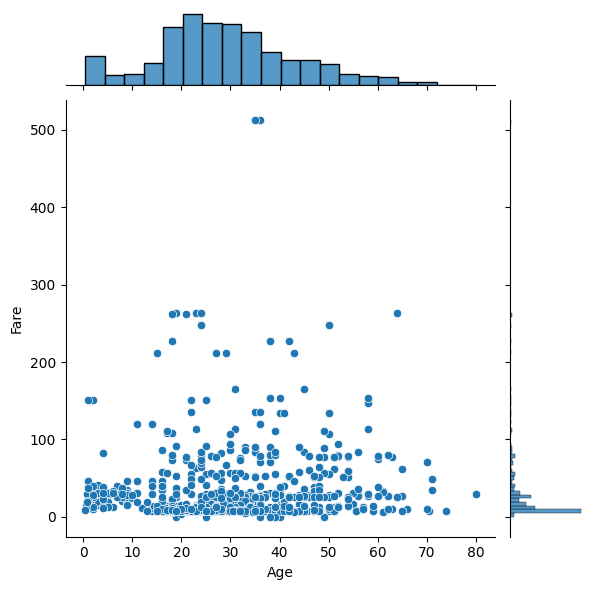

In [27]:
sns.jointplot(x="Age", y="Fare", data=train);

<ipython-input-28-9165a5927e9a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
<ipython-input-28-9165a5927e9a>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


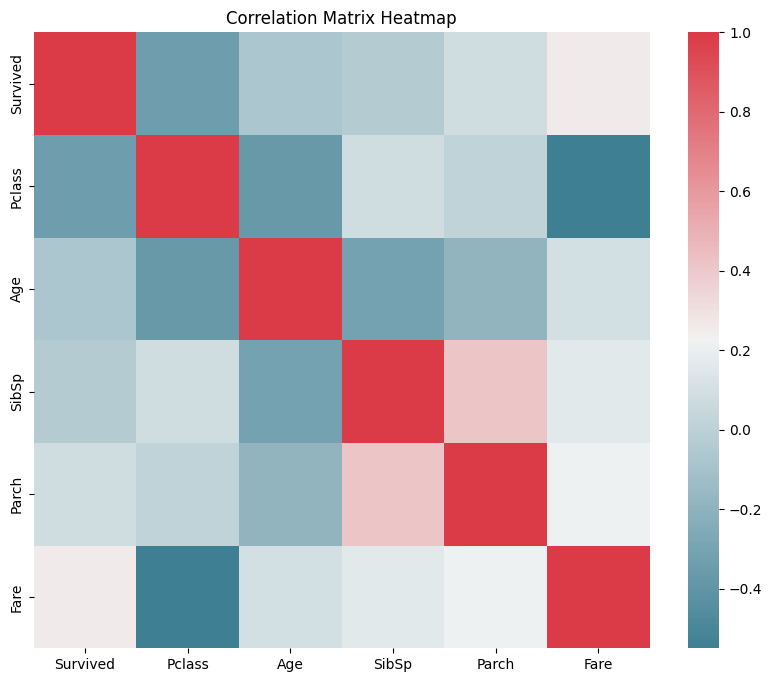

In [28]:
# Calculate the correlation matrix for the 'train' DataFrame
corr = train.corr()

# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 8))

# Define the heatmap color palette
color_palette = sns.diverging_palette(220, 10, as_cmap=True)

# Use Seaborn's heatmap method to create the heatmap
sns.heatmap(data=corr,
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=color_palette,
            square=True,
            ax=ax)

# Set the title
ax.set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [29]:
train['Name_len']=train.Name.str.len()

In [30]:
train['Ticket_First']=train.Ticket.str[0]

In [31]:
train['FamilyCount']=train.SibSp+train.Parch

In [32]:
train['Cabin_First']=train.Cabin.str[0]

In [33]:
# Regular expression to get the title of the Name
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [34]:
train.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


In [35]:
# we see that there are 15 Zero values and its reasonbale
# to flag them as missing values since every ticket
# should have a value greater than 0
print((train.Fare == 0).sum())

15


In [36]:
# mark zero values as missing or NaN
train.Fare = train.Fare.replace(0, np.NaN)

In [37]:
# validate to see if there are no more zero values
print((train.Fare == 0).sum())

0


In [38]:
# keep the index
train[train.Fare.isnull()].index

Int64Index([180, 264, 272, 278, 303, 414, 467, 482, 598, 634, 675, 733, 807,
            816, 823],
           dtype='int64', name='PassengerId')

In [39]:
train.Fare.mean()

32.75564988584475

In [40]:
# impute the missing Fare values with the mean Fare value
train.Fare.fillna(train.Fare.mean(),inplace=True)

In [41]:
# validate if any null values are present after the imputation
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


In [42]:
# we see that there are 0 Zero values
print((train.Age == 0).sum())

0


In [43]:
# impute the missing Age values with the mean Fare value
train.Age.fillna(train.Age.mean(),inplace=True)

In [44]:
# validate if any null values are present after the imputation
train[train.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


In [45]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
train.Cabin.isnull().mean()

0.7710437710437711

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Name_len      891 non-null    int64  
 12  Ticket_First  891 non-null    object 
 13  FamilyCount   891 non-null    int64  
 14  Cabin_First   204 non-null    object 
 15  title         890 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 118.3+ KB


In [47]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'Cabin_First', 'title'],
      dtype='object')

In [48]:
trainML = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [49]:
# drop rows of missing values
trainML = trainML.dropna()

In [50]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64

In [51]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [52]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.6182432432432432

In [53]:
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.6621621621621622

In [54]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.786036036036036

In [55]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6779279279279279

In [56]:
from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9887387387387387